# IC 4.9.2. Visualizations

### 0. List of Contents
#### 1. Importing Libraries and Dataframes 
#### 2. Trying Out Different Plots
#### 3. Histogram of the “order_hour_of_day” Column
#### 4. Bar Chart from the “loyalty_flag” Column
#### 5. Difference in expenditure depending on the hour of the day
#### 6. Connection Between Age and Family status
#### 7. Connection Between Age and Spending Power

### 1. Importing Libraries and Dataframes

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'/Users/fruzsinasari/Documents/Fru Python/Instacart Basket Analysis/'

In [5]:
# Importing customer df
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

### 2. Trying Out Different Plots

#### Bar Charts - Frequncy for DOW

<AxesSubplot:>

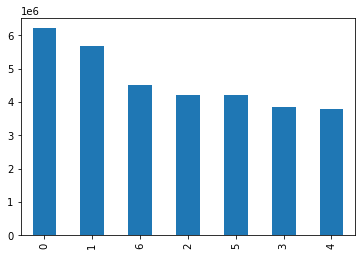

In [7]:
ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

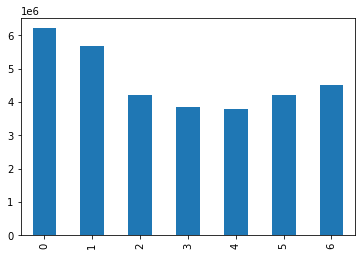

In [8]:
#bar chart without ordering observations from largets to smallets
ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

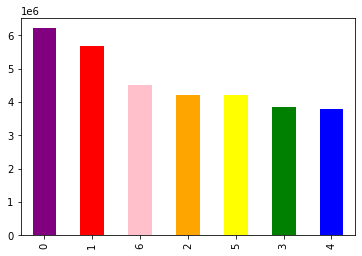

In [10]:
# Exporing colored bar chart
bar = ords_prods_cust['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

#### Histograms and Scatterplots for Prices

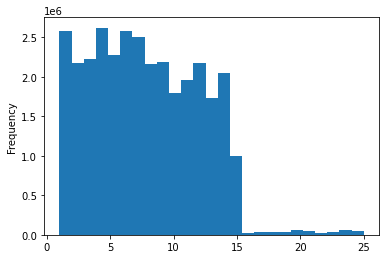

In [12]:
hist_1=ords_prods_cust['prices'].plot.hist(bins = 25)

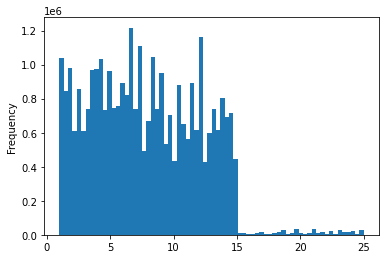

In [13]:
hist_2=ords_prods_cust['prices'].plot.hist(bins = 70)

In [15]:
# exporting hist_1
hist_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices_25.png'))

In [16]:
# exporting hist_2
hist_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices_70.png'))

<AxesSubplot:xlabel='prices', ylabel='prices'>

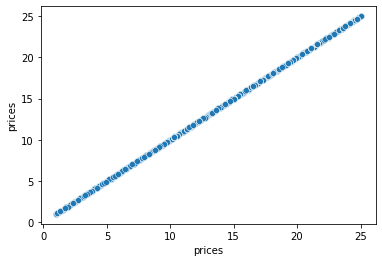

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

#### Creating Line Charts and Sampling Data

In [18]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [19]:
big = ords_prods_cust[dev]

In [20]:
small = ords_prods_cust[~dev]

In [21]:
len(ords_prods_cust)

32435059

In [22]:
len(big)+len(small)

32435059

In [23]:
df_2 = small[['orders_day_of_week','prices']]

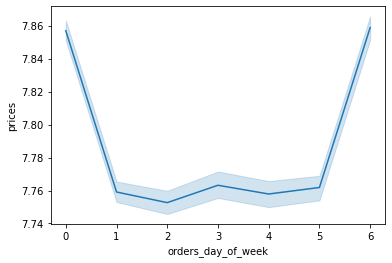

In [24]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [25]:
# exporting line
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_prices_dow.png'))

### 3. Histogram of the “order_hour_of_day” Column

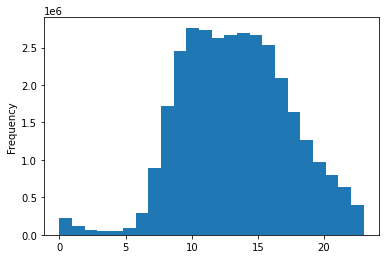

In [26]:
hist_hour=ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

#### The quitest hourse are between 0 and 6 in the morning, while the busiest hourse are from 9 am to 4 pm which actually follows the typical office hour times. I was expecting to see the most orders after 5-6pm, so after office hours, that's when the most/average person has free time to shop.

In [28]:
#Exporting hist
hist_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_hour.png'))

### 4. Bar Chart from the “loyalty_flag” Column

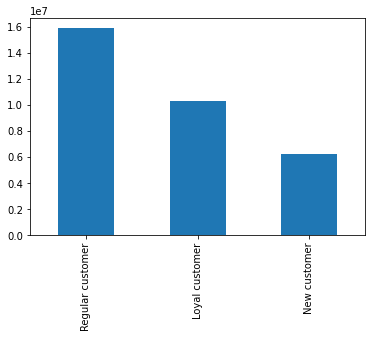

In [29]:
bar_loyalty=ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [30]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'))

### 5. Difference in expenditure depending on the hour of the day

#### Line charts  is needed for this task, because they are traditionally used to visualize the development of a characteristic over time. Since our database is too big, we need a representative sample of the data. I will use the same sample I used for my other line chart above 

In [32]:
# but a new sub df has to be created, because df_2 didn't includeorder_hour_of_day
df_3 = small[['order_hour_of_day','prices']]

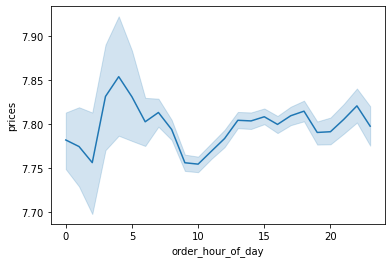

In [33]:
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

#### The line fluctuates a bit, the minium is around 7.75 at 10 o'clock and the maximum is at 7.85 shortly before 5 o'clock. The difference between the minimum and maximum is 10 cents, so not that significant. 

### 6. Connection Between Age and Family status 

In [34]:
df_4 = small[['Age','add_ppl_in_household']]

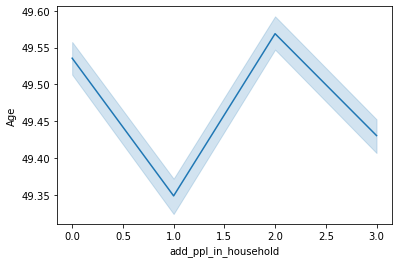

In [36]:
line_demo = sns.lineplot(data = df_4, x = 'add_ppl_in_household',y = 'Age')

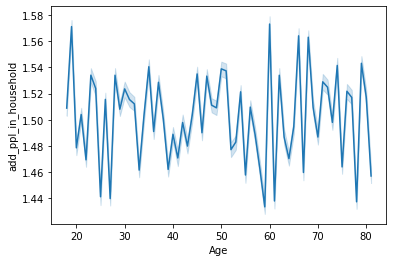

In [37]:
line_demo_trans = sns.lineplot(data = df_4, x = 'Age',y = 'add_ppl_in_household')

#### On average there isn't a clear connection between these two values

In [38]:
line_demo.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_demo.png'))

In [39]:
line_demo_trans.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_demo_trans.png'))

### 7. Connection Between Age and Spending Power

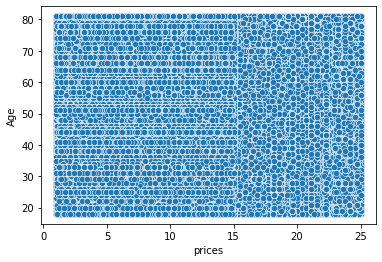

In [43]:
prices_age=sns.scatterplot(x = 'prices', y = 'Age',data = ords_prods_cust)

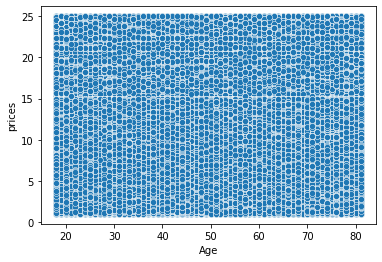

In [44]:
age_prices=sns.scatterplot(x = 'Age', y = 'prices',data = ords_prods_cust)

In [45]:
prices_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_age.png'))

#### The visualizations do not help to conclude too any insights, I wanted to check the exported version, but that wasn't good enought either as the quality of the viz is very low.